In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [6, 6]
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import r2_score

sns.set_style("white")

In [2]:
path = os.path.join(os.getcwd(), "FIFA 19 complete player dataset/data.csv")
df = pd.read_csv(path)
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
# Columns present in the dataset 
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [4]:
# Removing unecessary columns
unecessary_columns = ["Unnamed: 0", "ID", "Photo", "Flag", "Loaned From", "Release Clause", "Jersey Number"]
df.drop(unecessary_columns, axis=1, inplace=True)

In [5]:
# After removing columns
df.drop("Club Logo", axis=1, inplace=True)

In [6]:
df.columns.sort

<bound method Index.sort of Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Special', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Real Face',
       'Position', 'Joined', 'Contract Valid Until', 'Height', 'Weight', 'LS',
       'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM',
       'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB',
       'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning

In [7]:
# Number of countries available and top 5 countries with highest number of players 
print("The total number of countries present are: {}".format(df["Nationality"].nunique()))
print("The countries with the highest number of football players are: ")
print(df["Nationality"].value_counts().head(5))

The total number of countries present are: 164
The countries with the highest number of football players are: 
England      1662
Germany      1198
Spain        1072
Argentina     937
France        914
Name: Nationality, dtype: int64


In [8]:
# Total number of clubs present and top 5 clubs with highest number of players 
print("The total number of clubs present are: {}".format(df["Club"].nunique()))
print("The clubs with the highest number of players are: ")
print(df["Club"].value_counts().head(5))

The total number of clubs present are: 651
The clubs with the highest number of players are: 
FC Barcelona          33
Valencia CF           33
Fortuna Düsseldorf    33
Cardiff City          33
Rayo Vallecano        33
Name: Club, dtype: int64


In [9]:
# Since the wage column has K and M as suffix we will have to fix these and get proper int values
def fix_wage_col(df_value):
    try:
        value = float(df_value[1:-1])
        suffix = df_value[-1]
        
        if suffix == "M":
            value = value * 1000000
        elif suffix == "K":
            value = value * 1000
    except ValueError:
            value = 0
    return value

In [10]:
df["Value"] = df["Value"].apply(fix_wage_col)
df["Wage"] = df["Wage"].apply(fix_wage_col)

In [11]:
# Top earners
print("The top earners is: ", df.loc[df["Wage"].idxmax(), "Name"])
print("The most valued player is: ", df.loc[df["Value"].idxmax(), "Name"])

The top earners is:  L. Messi
The most valued player is:  Neymar Jr


In [12]:
# Best players in various aspects
aspects = ["Special", "Crossing", "Finishing", "HeadingAccuracy", "ShortPassing", "Volleys", "Dribbling", "Curve", 
           "FKAccuracy", "LongPassing", "BallControl", "Acceleration", "SprintSpeed", "Agility", "Reactions", 
           "Balance", "ShotPower", "Jumping", "Stamina", "Strength",
           "LongShots", "Aggression", "Interceptions", "Positioning", "Vision",
           "Penalties", "Composure", "Marking", "StandingTackle", "SlidingTackle",
           "GKDiving", "GKHandling", "GKKicking", "GKPositioning", "GKReflexes"]
print("The player with the best overall rating: {}".format(str(df.loc[df["Overall"].idxmax(), "Name"])))
print("The player with the best potential: {}".format(str(df.loc[df["Potential"].idxmax(), "Name"])))
print("The player with the best International Reputation: {}".format(str(df.loc[df["International Reputation"].idxmax(), "Name"])))
print("The player with the most skill moves: {}".format(str(df.loc[df["Skill Moves"].idxmax(), "Name"])))
for i in aspects:
    print(f"Best {i}: {df.loc[df[i].idxmax(), 'Name']}")

The player with the best overall rating: L. Messi
The player with the best potential: K. Mbappé
The player with the best International Reputation: L. Messi
The player with the most skill moves: Cristiano Ronaldo
Best Special: L. Suárez
Best Crossing: K. De Bruyne
Best Finishing: L. Messi
Best HeadingAccuracy: Naldo
Best ShortPassing: L. Modrić
Best Volleys: E. Cavani
Best Dribbling: L. Messi
Best Curve: Quaresma
Best FKAccuracy: L. Messi
Best LongPassing: T. Kroos
Best BallControl: L. Messi
Best Acceleration: Douglas Costa
Best SprintSpeed: K. Mbappé
Best Agility: Neymar Jr
Best Reactions: Cristiano Ronaldo
Best Balance: Bernard
Best ShotPower: Cristiano Ronaldo
Best Jumping: Cristiano Ronaldo
Best Stamina: N. Kanté
Best Strength: A. Akinfenwa
Best LongShots: L. Messi
Best Aggression: B. Pearson
Best Interceptions: N. Kanté
Best Positioning: Cristiano Ronaldo
Best Vision: L. Messi
Best Penalties: M. Balotelli
Best Composure: L. Messi
Best Marking: A. Barzagli
Best StandingTackle: G. Ch

<AxesSubplot:xlabel='Preferred Foot', ylabel='count'>

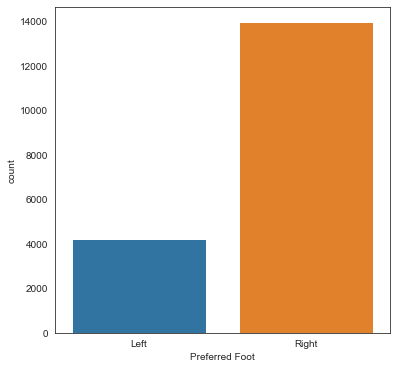

In [13]:
# Most preferred foot
sns.countplot(x="Preferred Foot", data=df)

<AxesSubplot:xlabel='Preferred Foot', ylabel='Overall'>

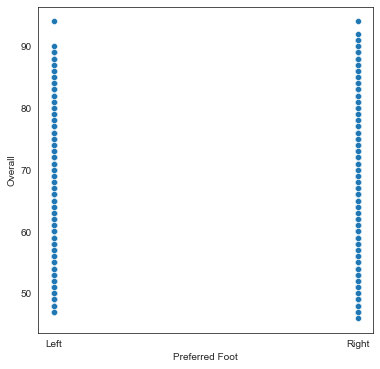

In [14]:
# Effect of preferred foot on players performace
# Doesn't matter much
sns.scatterplot(x="Preferred Foot", y="Overall", data=df)

In [15]:
# Impact of age on factors such as Overall, Potential....
factors = ["Overall", "Potential", "Special", "Crossing", "Finishing", "HeadingAccuracy", "ShortPassing", "Volleys", "Dribbling", "Curve", 
           "FKAccuracy", "LongPassing", "BallControl", "Acceleration", "SprintSpeed", "Agility", "Reactions", 
           "Balance", "ShotPower", "Jumping", "Stamina", "Strength",
           "LongShots", "Aggression", "Interceptions", "Positioning", "Vision",
           "Penalties", "Composure", "Marking", "StandingTackle", "SlidingTackle",
           "GKDiving", "GKHandling", "GKKicking", "GKPositioning", "GKReflexes"]

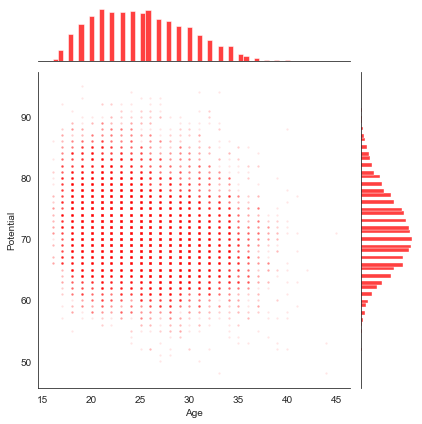

In [16]:
sns.jointplot(x=df['Age'],y=df['Potential'],
              joint_kws={'alpha':0.1,'s':5,'color':'red'},
              marginal_kws={'color':'red'})
# Potential tends to decrease as we age

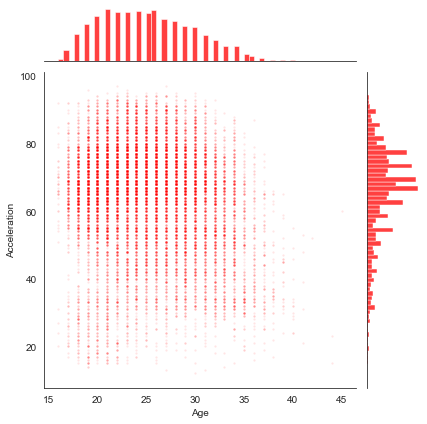

In [17]:
sns.jointplot(x=df['Age'],y=df['Acceleration'],
              joint_kws={'alpha':0.1,'s':5,'color':'red'},
              marginal_kws={'color':'red'})
# Acceleration tends to decrease as we age

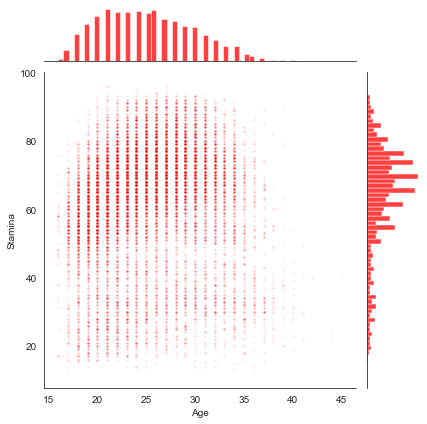

In [18]:
sns.jointplot(x=df['Age'],y=df['Stamina'],
              joint_kws={'alpha':0.1,'s':5,'color':'red'},
              marginal_kws={'color':'red'})
# Stamina doesn't change much

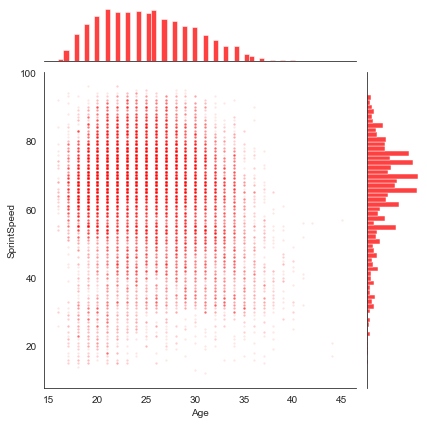

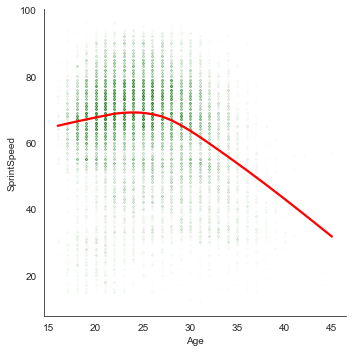

In [19]:
sns.jointplot(x=df['Age'],y=df['SprintSpeed'],
              joint_kws={'alpha':0.1,'s':5,'color':'red'},
              marginal_kws={'color':'red'})
# SprintSpeed tends to decrease as we age
# Let us further analyze this relation
sns.lmplot(x="Age", y="SprintSpeed", data=df,
          lowess=True,
          scatter_kws={"alpha":0.01, "s":5, "color":"green"},
          line_kws={"color":"red"})
# SprintSpeed decreases drastically as the players age

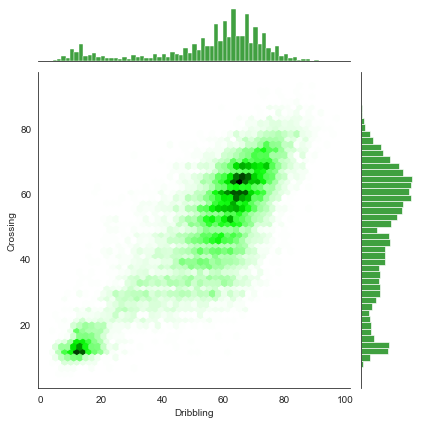

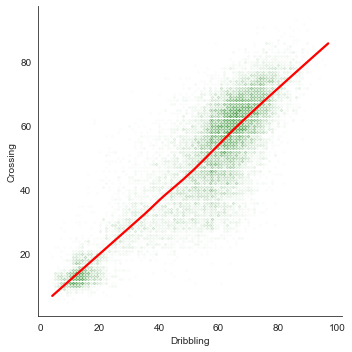

In [20]:
# Relation between dribbling and crossing
sns.jointplot(x=df["Dribbling"], y=df["Crossing"], kind="hex", color="Green")
# Those players who have high dribbling skills tend to have good crossing
# Let's see if they have a linear relation
sns.lmplot(x="Dribbling", y="Crossing", data=df,
          lowess=True,
          scatter_kws={"alpha":0.01, "s":5, "color":"green"},
          line_kws={"color":"red"})
# Linear relation

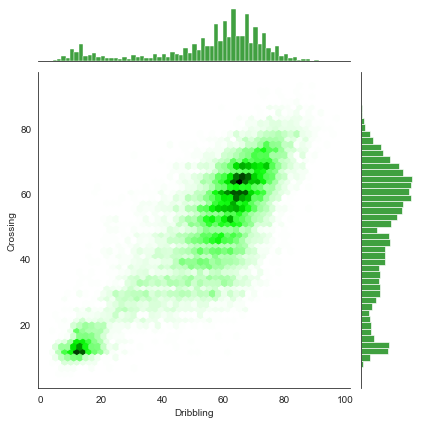

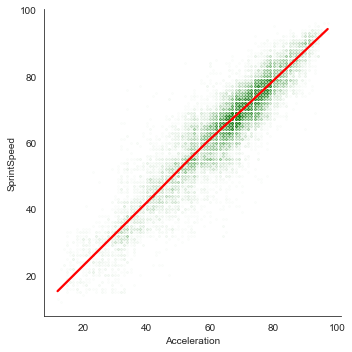

In [21]:
# Relation between SprintSpeed and Acceleration
sns.jointplot(x=df["Dribbling"], y=df["Crossing"], kind="hex", color="Green")
sns.lmplot(x="Acceleration", y="SprintSpeed", data=df,
          lowess=True,
          scatter_kws={"alpha":0.01, "s":5, "color":"green"},
          line_kws={"color":"red"})